<!--NAVIGATION-->
<span style='background: rgb(128, 128, 128, .15); width: 100%; display: block; padding: 10px 0 10px 10px'>< [Read Data](03.01-Read-Data.ipynb) | [Contents](00.00-Index.ipynb) | [Quiz 3](03.03-Quiz.ipynb) ></span>

<a href="https://colab.research.google.com/github/eurostat/e-learning/blob/main/r-official-statistics/03.02-Official-Statistics.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>


<a id='top'></a>

# Data sources for official statistics
## Content  

- [rsdmx](#rsdmx)
- [OECD](#OECD)
- [readsdmx](#readsdmx)
- [ecb](#ecb)
- [RJSDMX](#RJSDMX)
- [restatapi](#restatapi)
- [giscoR](#giscoR)


<a id='rsdmx'></a>

## rsdmx
rsdmx offers a low-level set of tools to read data and metadata in SDMX format. Its strategy is to make it very easy for the user. For this, a unique function named readSDMX has to be used, whatever it is a data or metadata document, or if it is local or remote datasource.  

https://github.com/opensdmx/rsdmx  
  <br>  
  
Examples:

In [1]:
if (!require("rsdmx")) {
    install.packages("rsdmx")
    library(rsdmx)
}
# check providers
head(as.data.frame(getSDMXServiceProviders()), 4)
# Read remote datasets
oecdUrl <- "https://stats.oecd.org/restsdmx/sdmx.ashx/GetData/MIG/TOT../OECD?startTime=2000&endTime=2011"
dataset <- readSDMX(oecdUrl)
stats <- as.data.frame(dataset)
head(stats)

Loading required package: rsdmx



,agencyId,name,scale,country,builder,compliant
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,ECB,European Central Bank,international,NA,SDMXREST21RequestBuilder,TRUE
2,ESTAT,Eurostat (Statistical office of the European Union),international,NA,SDMXREST21RequestBuilder,TRUE
3,IMF,International Monetary Fund,international,NA,SDMXREST21RequestBuilder,TRUE
4,OECD,Organisation for Economic Cooperation and Development,international,NA,SDMXDotStatRequestBuilder,FALSE


,CO2,VAR,GEN,COU,TIME_FORMAT,obsTime,obsValue,OBS_STATUS
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>
1,TOT,B11,WMN,AUS,P1Y,2000,54754,NA
2,TOT,B11,WMN,AUS,P1Y,2001,65079,NA
3,TOT,B11,WMN,AUS,P1Y,2002,60958,NA
4,TOT,B11,WMN,AUS,P1Y,2003,63768,NA
5,TOT,B11,WMN,AUS,P1Y,2004,74957,NA
6,TOT,B11,WMN,AUS,P1Y,2005,82155,NA


<a id='OECD'></a>

## OECD
The OECD package allows the user to download data from the OECD’s API in a dynamic and reproducible way.  
https://github.com/expersso/OECD  
  <br>  
  
Examples:

In [2]:
if (!require("OECD")) {
    install.packages("OECD")
    library(OECD)
}
# search a dataset
dataset_list <- get_datasets()
search_dataset("unemployment", data = dataset_list)
# get some data:
# duration of unemployment (DUR_D) of men aged 20 to 24 in Germany and France. 
df <- get_dataset(dataset = "DUR_D", filter = list(c("DEU", "FRA"), "MW", "2024"))
head(df)

Loading required package: OECD



,id,title
,<chr>,<chr>
94,DUR_I,Incidence of unemployment by duration
95,DUR_D,Unemployment by duration
160,AVD_DUR,Average duration of unemployment
674,AEO2012_CH6_FIG4,Figure 4: Youth and adult unemployment
706,AEO2012_CH6_FIG29,Figure 29: Youth employment and unemployment by education and country income groups
754,AEO2012_CH6_FIG19,Figure 19: The trade off between vulnerable employment and unemployment
968,PTRUB,PTR for families claiming Unemployment Benefits
1022,MIG_NUP_RATES_GENDER,"Employment, unemployment, and participation rates by place of birth and sex"
1338,NRR,Net replacement rate in unemployment


,AGE,COUNTRY,DURATION,FREQUENCY,ObsValue,SEX,TIME_FORMAT,Time
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,2024,FRA,UN1,A,30.9699993133545,MW,P1Y,1975
2,2024,FRA,UN1,A,27.1599998474121,MW,P1Y,1976
3,2024,FRA,UN1,A,29.2099990844727,MW,P1Y,1977
4,2024,FRA,UN1,A,26.5200004577637,MW,P1Y,1978
5,2024,FRA,UN1,A,32.0200004577637,MW,P1Y,1979
6,2024,FRA,UN1,A,31.9300003051758,MW,P1Y,1980


<a id='readsdmx'></a>

## readsdmx
Read sdmx data into dataframes from either a local SDMX-ML file or from a SDMX web-service.  
https://github.com/mdequeljoe/readsdmx  
  <br>  
  
Examples:

In [3]:
if (!require("readsdmx")) {
    install.packages("readsdmx")
    library(readsdmx)
}

url <-  "https://stats.oecd.org/restsdmx/sdmx.ashx/GetData/HH_DASH/..Q"
df <- readsdmx::read_sdmx(url)
head(df)

Loading required package: readsdmx



,FREQUENCY,INDICATOR,LOCATION,ObsValue,POWERCODE,TIME_FORMAT,Time
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,Q,UNEMPRATE,IRL,4.9,0,P3M,2007-Q1
2,Q,UNEMPRATE,IRL,5,0,P3M,2007-Q2
3,Q,UNEMPRATE,IRL,4.9,0,P3M,2007-Q3
4,Q,UNEMPRATE,IRL,5.2,0,P3M,2007-Q4
5,Q,UNEMPRATE,IRL,5.37,0,P3M,2008-Q1
6,Q,UNEMPRATE,IRL,5.93,0,P3M,2008-Q2


<a id='ecb'></a>

## ecb
Provides an interface to the European Central Bank's Statistical Data Warehouse API, allowing for programmatic retrieval of a vast quantity of statistical data.  
https://github.com/cran/ecb  
  <br>  
  
Examples:

In [4]:
if (!require("ecb")) {
    install.packages("ecb")
    library(ecb)
}
## get dimensions
dims <- get_dimensions("ICP.M.DE.N.000000+XEF000.4.ANR")
lapply(dims, head)
# read some data
unemp <- ecb::get_data("LFSI.M..S.UNEHRT.TOTAL0.15_74.T", 
                 filter = list(startPeriod = "2000"))
head(unemp)

Loading required package: ecb



,dim,value
,<chr>,<chr>
1,FREQ,M
2,REF_AREA,DE
3,ADJUSTMENT,N
4,ICP_ITEM,000000
5,STS_INSTITUTION,4
6,ICP_SUFFIX,ANR
,dim,value
,<chr>,<chr>
1,FREQ,M


,freq,ref_area,adjustment,lfs_indicator,lfs_breakdown,age_breakdown,gender,obstime,obsvalue
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
1,M,AT,S,UNEHRT,TOTAL0,15_74,T,2000-01,4.282376
2,M,AT,S,UNEHRT,TOTAL0,15_74,T,2000-02,4.262103
3,M,AT,S,UNEHRT,TOTAL0,15_74,T,2000-03,4.135780
4,M,AT,S,UNEHRT,TOTAL0,15_74,T,2000-04,3.841552
5,M,AT,S,UNEHRT,TOTAL0,15_74,T,2000-05,3.666299
6,M,AT,S,UNEHRT,TOTAL0,15_74,T,2000-06,3.633573


<a id='RJSDMX'></a>

## RJSDMX
Provides functions to retrieve data and metadata from providers that disseminate data by means of SDMX web services.  
https://github.com/amattioc/SDMX/tree/master/RJSDMX  
  <br>  

_Note: For this package to have it working, a java VM must be installed on the computer!_  


  <br>  
  
Examples:

In [5]:
if (!require("RJSDMX")) {
    install.packages("RJSDMX")
    library(RJSDMX)
}
# get providers
RJSDMX::getProviders()
# datasets
head(RJSDMX::getFlows('EUROSTAT'))
# dimensions
head(RJSDMX::getDimensions('EUROSTAT', 'prc_hicp_midx'))
# time series
ans <- RJSDMX::getTimeSeries(start = '2021', 'EUROSTAT', 'prc_hicp_midx.M.I05.CP00.EU+DE')
ans

Loading required package: RJSDMX

Loading required package: rJava

Loading required package: zoo


Attaching package: 'zoo'


The following objects are masked from 'package:base':

    as.Date, as.Date.numeric




[1] "ABS"              "ECB"              "EUROSTAT"         "ILO"             
 [5] "ILO_Legacy"       "IMF2"             "IMF_SDMX_CENTRAL" "INEGI"           
 [9] "INSEE"            "ISTAT"            "ISTAT_CENSUS_AGR" "ISTAT_CENSUS_IND"
[13] "ISTAT_CENSUS_POP" "NBB"              "OECD"             "OECD_RESTR"      
[17] "StatsEE"          "UIS"              "UNDATA"           "WB"              
[21] "WITS"

$`ESTAT,tus_00hhstatus,1.0`
[1] "Time spent, participation time and participation rate in the main activity by sex and household composition"

$`ESTAT,lfso_17seworg,1.0`
[1] "Self-employed persons having at least one client in the last 12 months by control over working time, and sex"

$`ESTAT,ilc_li06h,1.0`
[1] "At-risk-of-poverty rate by poverty threshold and work intensity of the household - ECHP survey"

$`ESTAT,htec_emp_risced,1.0`
[1] "Employment in technology and knowledge-intensive sectors by NUTS 1 regions and level of education (1994-2008, NACE Rev. 1.1)"

$`ESTAT,ilc_mddu06b,1.0`
[1] "Persons who cannot afford to replace worn-out clothes by some new (not second-hand) ones by employment status and income quintile"

$`ESTAT,tour_dem_tnq,1.0`
[1] "Number of nights spent - quarterly data"

[[1]]
[[1]]$FREQ
[1] "ESTAT/CL_FREQ/1.0"


[[2]]
[[2]]$UNIT
[1] "ESTAT/CL_UNIT/1.0"


[[3]]
[[3]]$COICOP
[1] "ESTAT/CL_COICOP/1.0"


[[4]]
[[4]]$GEO
[1] "ESTAT/CL_GEO/1.0"

$prc_hicp_midx.M.I05.CP00.DE
Jan 2021 Feb 2021 Mar 2021 Apr 2021 May 2021 Jun 2021 Jul 2021 Aug 2021 
   125.0    125.7    126.2    126.8    127.2    127.6    128.4    128.5 
Sep 2021 Oct 2021 Nov 2021 Dec 2021 Jan 2022 Feb 2022 Mar 2022 Apr 2022 
   128.8    129.6    129.8    130.2    131.4    132.5    135.8    136.8 
May 2022 
   138.3 

$prc_hicp_midx.M.I05.CP00.EU
Jan 2021 Feb 2021 Mar 2021 Apr 2021 May 2021 Jun 2021 Jul 2021 Aug 2021 
  128.96   129.30   130.40   131.15   131.52   131.84   131.88   132.32 
Sep 2021 Oct 2021 Nov 2021 Dec 2021 Jan 2022 Feb 2022 Mar 2022 Apr 2022 
  132.96   134.14   134.78   135.42   136.15   137.34   140.61   141.78 
May 2022 
  143.13 


<a id='restatapi'></a>

## restatapi
Search and retrieve data from Eurostat database using SDMX.  
https://github.com/eurostat/restatapi  
  <br>  
  
Examples:

In [6]:
if (!require("restatapi")) {
    install.packages("restatapi")
    library(restatapi)
}
# Download the Data Structure Definition (DSD) and search on it
dsd <- restatapi::get_eurostat_dsd("ei_bsfs_q")
restatapi::search_eurostat_dsd("EU", dsd, name=FALSE)
# get some row data as data.table
head(restatapi::get_eurostat_raw("NAMA_10_GDP",melt=FALSE))
# get some data as data.table
head(restatapi::get_eurostat_data("NAMA_10_GDP"))

Loading required package: restatapi

restatapi: - version 0.13.3
           - config file with the API version 1 loaded from GitHub (the 'current' API version number is 1).
           - 2 from the 4 cores are used for parallel computing, can be changed with 'options(restatapi_cores=...)'
           - 'libcurl' method will be used for file download, can be changed with 'options(restatapi_dmethod=...)'
           - the Table of contents (TOC) was not pre-loaded into the deafult cache ('.restatapi_env').



,pattern,concept,code,name
,<chr>,<chr>,<chr>,<chr>
31,EU,GEO,EU27_2020,European Union - 27 countries (from 2020)


"unit,na_item,geo\time",2021,2020,2019,2018,2017,2016,2015,2014,2013,⋯,1984,1983,1982,1981,1980,1979,1978,1977,1976,1975
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
"CLV05_MEUR,B1G,AT",270365.4,258371.1,277157.2,273213.7,266016.9,259996.4,255017.1,252879.7,251167.1,⋯,:,:,:,:,:,:,:,:,:,:
"CLV05_MEUR,B1G,BA",11154.0,10532.2,10821.3,10515.0,10135.1,9811.3,9511.2,9224.4,9118.0,⋯,:,:,:,:,:,:,:,:,:,:
"CLV05_MEUR,B1G,BE",343926.1 p,324121.0 p,342250.5,334846.9,328736.7,323677.5,320657.4,313684.3,308495.4,⋯,:,:,:,:,:,:,:,:,:,:
"CLV05_MEUR,B1G,BG",29421.7 p,28387.3,29721.6,28654.5,27691.2,26806.7,26129.3,25373.6,25127.0,⋯,:,:,:,:,:,:,:,:,:,:
"CLV05_MEUR,B1G,CH",440224.6,424629.5,434166.1,428690.5,415990.3,409449.3,401210.1,394744.2,385200.1,⋯,:,:,:,:,:,:,:,:,:,:
"CLV05_MEUR,B1G,CY",17298.0 p,16391.3,17251.1,16385.4,15498.7,14637.2,13751.8,13323.0,13571.3,⋯,:,:,:,:,:,:,:,:,:,:


unit,na_item,geo,time,values
<fct>,<fct>,<fct>,<fct>,<dbl>
CLV05_MEUR,B1G,AT,1995,177617.0
CLV05_MEUR,B1G,AT,1996,180999.4
CLV05_MEUR,B1G,AT,1997,184799.1
CLV05_MEUR,B1G,AT,1998,192025.4
CLV05_MEUR,B1G,AT,1999,198247.2
CLV05_MEUR,B1G,AT,2000,205898.4


<a id='giscoR'></a>

## giscoR
giscoR is an API package that helps to retrieve data from Eurostat - GISCO (the Geographic Information System of the COmmission). It also provides some lightweight data sets ready to use without downloading.  
https://github.com/rOpenGov/giscoR  
  <br>  
  
Examples:

Warning message in st_point_on_surface.sfc(sf::st_zm(x)):
"st_point_on_surface may not give correct results for longitude/latitude data"


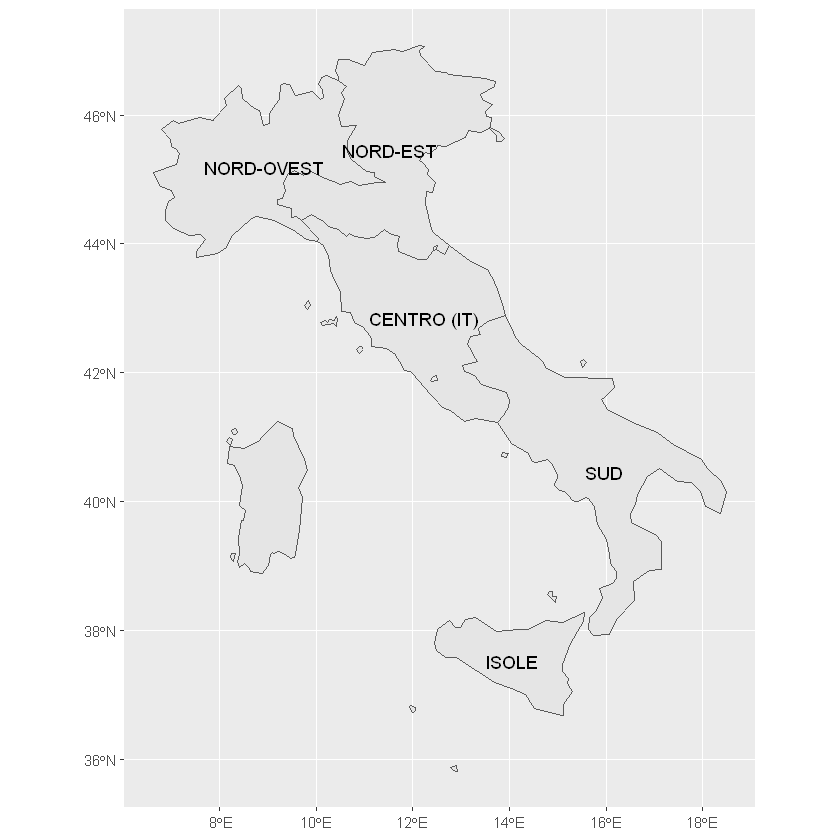

In [8]:
if (!require("giscoR")) {
    install.packages("giscoR")
    library(giscoR)
}
if (!require("ggplot2")) {
    install.packages("ggplot2")
    library(ggplot2)
}

ITA <- gisco_get_nuts(country = "Italy", nuts_level = 1)
ggplot(ITA) +
  geom_sf() +
  geom_sf_text(aes(label = NAME_LATN)) +
  theme(axis.title = element_blank())

<!--NAVIGATION-->
<span style='background: rgb(128, 128, 128, .15); width: 100%; display: block; padding: 10px 0 10px 10px'>< [Read Data](03.01-Read-Data.ipynb) | [Contents](00.00-Index.ipynb) | [Quiz 3](03.03-Quiz.ipynb) > [Top](#top) ^ </span>

<span style='background: rgb(128, 128, 128, .15); width: 100%; display: block; padding: 10px 0 10px 10px'>This is the Jupyter notebook version of the __Python for Official Statistics__ produced by Eurostat; the content is available [on GitHub](https://github.com/eurostat/e-learning/tree/main/python-official-statistics).
<br>The text and code are released under the [EUPL-1.2 license](https://github.com/eurostat/e-learning/blob/main/LICENSE).</span>